In [ ]:
# Clone your repository
!git clone https://github.com/mahb97/joyce-dubliners-similes-analysis

# Change to the repository directory
import os
os.chdir('joyce-dubliners-similes-analysis')

# Install spaCy and download the large model
!pip install spacy
!python -m spacy download en_core_web_lg

fatal: destination path 'joyce-dubliners-similes-analysis' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import pandas as pd
import plotly.express as px

# Test spaCy installation
nlp = spacy.load("en_core_web_lg")
print("spaCy loaded successfully!")

# Test on Joyce sentence
text = "There was no hope for him this time: it was the third stroke."
doc = nlp(text)
for token in doc:
    print(f"{token.text} | {token.pos_} | {token.dep_}")

spaCy loaded successfully!
There | PRON | expl
was | VERB | ccomp
no | DET | det
hope | NOUN | attr
for | ADP | prep
him | PRON | pobj
this | DET | det
time | NOUN | npadvmod
: | PUNCT | punct
it | PRON | nsubj
was | AUX | ROOT
the | DET | det
third | ADJ | amod
stroke | NOUN | attr
. | PUNCT | punct


In [2]:
import pandas as pd
import numpy as np
from google.colab import files

# Upload your dataset
print("Upload your original dataset CSV file:")
uploaded = files.upload()

# Load the dataset (replace 'your_file.csv' with actual filename)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Set random seed for reproducibility
np.random.seed(42)

# Calculate 20% sample size
sample_size = int(len(df) * 0.2)
print(f"Original dataset size: {len(df)}")
print(f"20% sample size: {sample_size}")

# Random sampling
reliability_sample = df.sample(n=sample_size, random_state=42)

# Add columns for reliability testing
reliability_sample = reliability_sample.copy()
reliability_sample['Time2_Category'] = ''  # Empty for your re-annotation
reliability_sample['Agreement'] = ''
reliability_sample['Discrepancy_Notes'] = ''

# Display sample
print("\nSample preview:")
print(reliability_sample.head())

# Download the reliability testing subset
reliability_sample.to_csv('reliability_test_subset.csv', index=False)
files.download('reliability_test_subset.csv')

print(f"\nDownloaded: reliability_test_subset.csv")
print("This file contains your random 20% sample for re-annotation")

Upload your original dataset CSV file:


Saving All Similes - Dubliners cont-2 (1)(Sheet1)-3.csv to All Similes - Dubliners cont-2 (1)(Sheet1)-3.csv
Original dataset size: 184
20% sample size: 36

Sample preview:
         ID           Story   Page No.  \
19    J-S20    An Encounter         19   
42    J-S42  After The Race    49 & 50   
156  J-S155        The Dead        229   
111  J-S110        A Mother        165   
148  J-S147        The Dead  216 & 217   

                                      Sentence Context Comparator Type   \
19   I'm surprised at boys like you, educated, read...             like   
42   They took the train at Westland Row and in a f...           seemed   
156  I like that idea very much but wouldn’t a comf...        as ADJ as   
111  But Kathleen gathered in her skirt and said: N...             like   
148  Her voice had a catch in it like her son’s and...             like   

     Category (Framwrok) Additional Notes  \
19              Standard              NaN   
42   Joycean_Quasi_Fuzzy          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Downloaded: reliability_test_subset.csv
This file contains your random 20% sample for re-annotation


Upload your completed reliability test CSV:


Saving IRR_Validation_Dubliners_Similes.csv to IRR_Validation_Dubliners_Similes (1).csv
=== INTRA-RATER RELIABILITY RESULTS ===
Total cases analyzed: 36
Perfect matches: 34
Observed agreement: 0.944 (94.4%)
Cohen's Kappa: 0.918
Kappa interpretation: Almost perfect agreement

=== DISAGREEMENT ANALYSIS ===
Number of disagreements: 2

Disagreement patterns:
  Joycean_Quasi → Joycean_Quasi_Fuzzy: 1 cases
  Joycean_Quasi → Standard: 1 cases


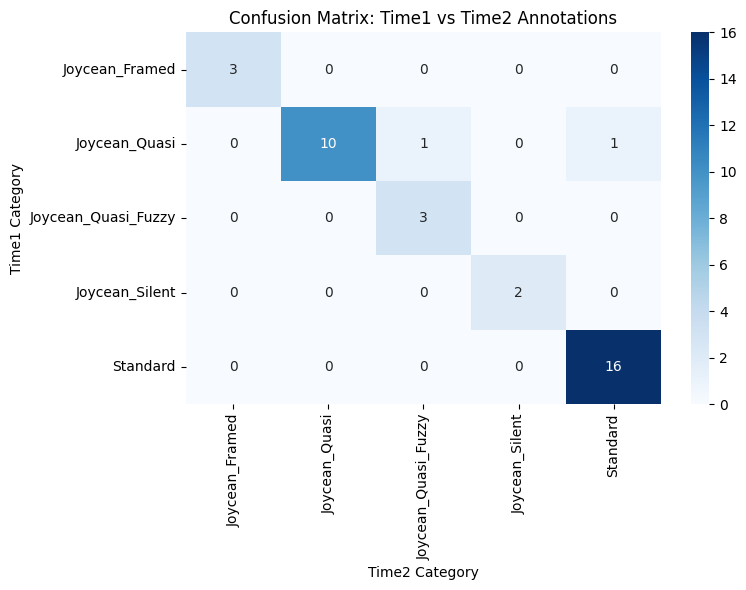


=== CATEGORY-SPECIFIC ANALYSIS ===
Joycean_Framed: 3/3 consistent (100.0%)
Joycean_Quasi: 10/12 consistent (83.3%)
Joycean_Quasi_Fuzzy: 3/4 consistent (75.0%)
Joycean_Silent: 2/2 consistent (100.0%)
Standard: 16/17 consistent (94.1%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Files downloaded: reliability_results_summary.csv, confusion_matrix.png


In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload your completed reliability test file
print("Upload your completed reliability test CSV:")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Remove any rows where either annotation is missing
df_clean = df.dropna(subset=['Time1_Category', 'Time2_Category'])

# Calculate basic agreement statistics
total_cases = len(df_clean)
matches = (df_clean['Time1_Category'] == df_clean['Time2_Category']).sum()
observed_agreement = matches / total_cases

print(f"=== INTRA-RATER RELIABILITY RESULTS ===")
print(f"Total cases analyzed: {total_cases}")
print(f"Perfect matches: {matches}")
print(f"Observed agreement: {observed_agreement:.3f} ({observed_agreement*100:.1f}%)")

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(df_clean['Time1_Category'], df_clean['Time2_Category'])
print(f"Cohen's Kappa: {kappa:.3f}")

# Interpret Kappa score
if kappa >= 0.81:
    interpretation = "Almost perfect agreement"
elif kappa >= 0.61:
    interpretation = "Substantial agreement"
elif kappa >= 0.41:
    interpretation = "Moderate agreement"
elif kappa >= 0.21:
    interpretation = "Fair agreement"
else:
    interpretation = "Poor agreement"

print(f"Kappa interpretation: {interpretation}")

# Detailed disagreement analysis
print(f"\n=== DISAGREEMENT ANALYSIS ===")
disagreements = df_clean[df_clean['Time1_Category'] != df_clean['Time2_Category']]
print(f"Number of disagreements: {len(disagreements)}")

if len(disagreements) > 0:
    print("\nDisagreement patterns:")
    disagreement_patterns = disagreements.groupby(['Time1_Category', 'Time2_Category']).size()
    for (cat1, cat2), count in disagreement_patterns.items():
        print(f"  {cat1} → {cat2}: {count} cases")

# Create confusion matrix
categories = sorted(list(set(df_clean['Time1_Category'].tolist() + df_clean['Time2_Category'].tolist())))
cm = confusion_matrix(df_clean['Time1_Category'], df_clean['Time2_Category'], labels=categories)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix: Time1 vs Time2 Annotations')
plt.xlabel('Time2 Category')
plt.ylabel('Time1 Category')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Category-specific reliability
print(f"\n=== CATEGORY-SPECIFIC ANALYSIS ===")
for category in categories:
    cat_subset = df_clean[(df_clean['Time1_Category'] == category) |
                          (df_clean['Time2_Category'] == category)]
    if len(cat_subset) > 0:
        cat_matches = (cat_subset['Time1_Category'] == cat_subset['Time2_Category']).sum()
        cat_total = len(cat_subset)
        print(f"{category}: {cat_matches}/{cat_total} consistent ({cat_matches/cat_total*100:.1f}%)")

# Save results summary
results_summary = pd.DataFrame({
    'Metric': ['Total Cases', 'Matches', 'Observed Agreement', 'Cohen\'s Kappa', 'Interpretation'],
    'Value': [total_cases, matches, f"{observed_agreement:.3f}", f"{kappa:.3f}", interpretation]
})

results_summary.to_csv('reliability_results_summary.csv', index=False)
files.download('reliability_results_summary.csv')
files.download('confusion_matrix.png')

print(f"\nFiles downloaded: reliability_results_summary.csv, confusion_matrix.png")